In [1]:
# ライブラリのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
df = pd.read_csv('T_H_RESULT_T20.csv', usecols=['W_DEPARTURE','H_DEPARTURE','H_ARRIVAL','precipitation','DELAY_DEPARTURE','DELAY_ARRIVAL'])
# 正しく読み込まれたことを確認

df.head()

,W_DEPARTURE,H_DEPARTURE,H_ARRIVAL,precipitation,DELAY_DEPARTURE,DELAY_ARRIVAL
0,1,8,10,0,0,0
1,1,13,15,0,0,-21
2,1,17,18,0,0,-23
3,1,19,20,0,0,-19
4,2,8,10,0,0,-2


In [25]:
df_target = df['DELAY_ARRIVAL']
df_target.head()

0     0
1   -21
2   -23
3   -19
4    -2
Name: DELAY_ARRIVAL, dtype: int64

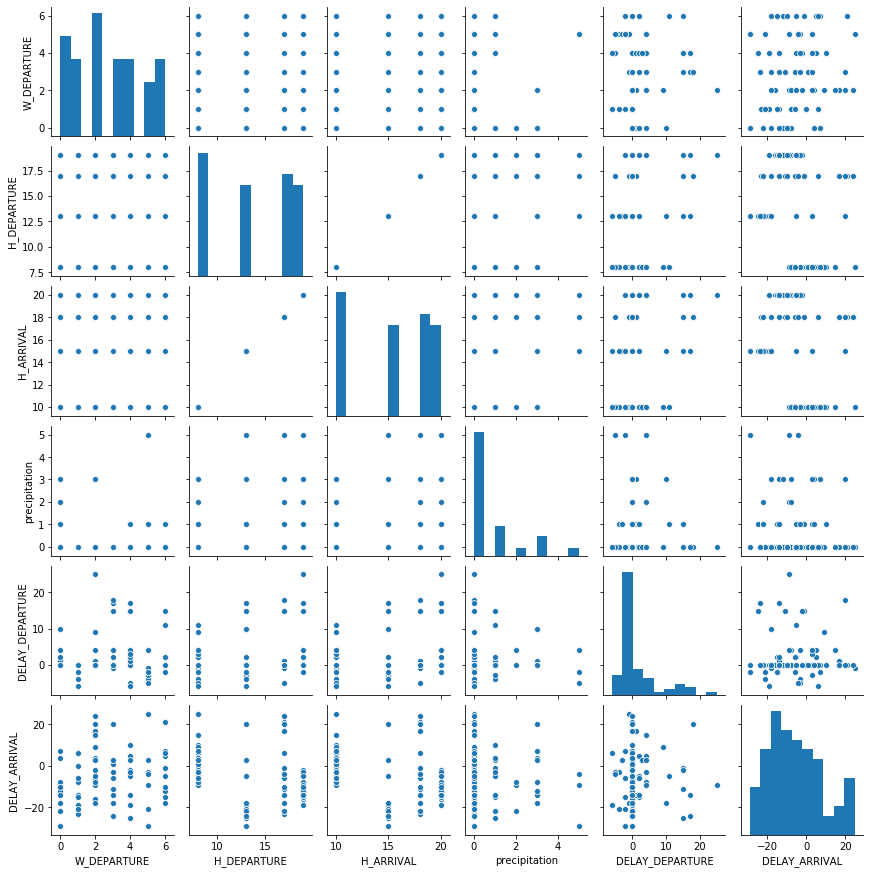

In [26]:
# 散布図行列を出力（時間がかかります）
import seaborn as sns
sns.pairplot(df, height=2.0)
plt.show()

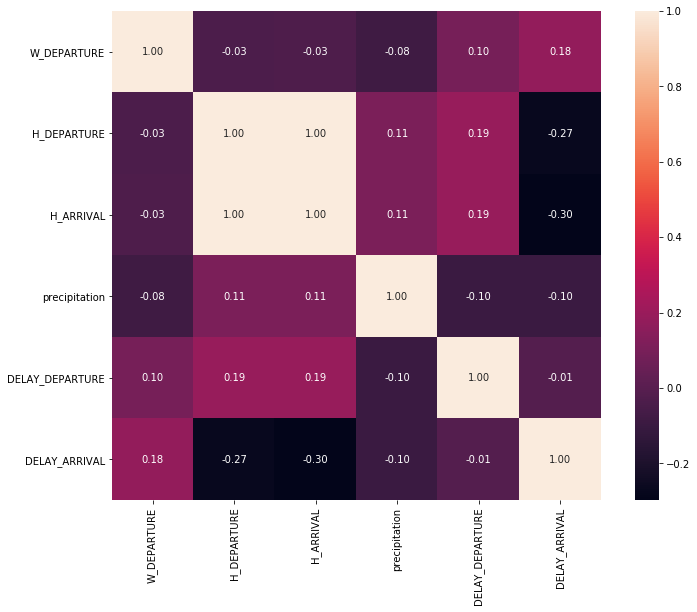

In [27]:
# ヒートマップの表示
plt.figure(figsize=(12, 9))
# annot：数値を表示するか
# square：正方形で表示するか
# fmt：表示する数値の型（.2f→float型で小数点以下２桁表示）
sns.heatmap(df.corr(), annot=True, square=True, fmt='.2f')
plt.show()

In [32]:
X = df.loc[:, ['W_DEPARTURE', 'H_DEPARTURE','H_ARRIVAL']].values
y = df.loc[:, ['DELAY_ARRIVAL']].values

# ホールド・アウト法によるデータの分割（今回はtestを２割とする）
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# 分割されたデータの個数を確認
# print(X.shape)
# print(y.shape)
# print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)

In [30]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
# 決定係数：データのモデルへの当てはまりの良さ
print('train: %.3f' % lr.score(X_train, y_train))
print('test : %.3f' % lr.score(X_test, y_test))

train: 0.305
test : 0.324


/Users/xiafei/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_base.py:533: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


In [54]:
df = pd.read_csv('T_H_RESULT_T20.csv', usecols=['W_DEPARTURE','H_DEPARTURE','H_ARRIVAL','precipitation','DELAY_DEPARTURE','DELAY_ARRIVAL'])

#星期离散化
weeks = pd.get_dummies(df['W_DEPARTURE'])
weeks = weeks.add_prefix("{}_".format('DAY_WEEK'))
# data_learn.drop('animal',axis=1,inplace=True)
df = df.join(weeks)

times = pd.get_dummies(df['H_DEPARTURE'])
times = times.add_prefix("{}_".format('TIME_DAY'))
df = df.join(times)

df.head()

,W_DEPARTURE,H_DEPARTURE,H_ARRIVAL,precipitation,DELAY_DEPARTURE,DELAY_ARRIVAL,DAY_WEEK_0,DAY_WEEK_1,DAY_WEEK_2,DAY_WEEK_3,DAY_WEEK_4,DAY_WEEK_5,DAY_WEEK_6,TIME_DAY_8,TIME_DAY_13,TIME_DAY_17,TIME_DAY_19
0,1,8,10,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,1,13,15,0,0,-21,0,1,0,0,0,0,0,0,1,0,0
2,1,17,18,0,0,-23,0,1,0,0,0,0,0,0,0,1,0
3,1,19,20,0,0,-19,0,1,0,0,0,0,0,0,0,0,1
4,2,8,10,0,0,-2,0,0,1,0,0,0,0,1,0,0,0


In [55]:
df.drop('W_DEPARTURE',axis=1,inplace=True)
df.drop('H_DEPARTURE',axis=1,inplace=True)
df.drop('H_ARRIVAL',axis=1,inplace=True)
df.drop('DELAY_ARRIVAL',axis=1,inplace=True)

df.head()

,precipitation,DELAY_DEPARTURE,DAY_WEEK_0,DAY_WEEK_1,DAY_WEEK_2,DAY_WEEK_3,DAY_WEEK_4,DAY_WEEK_5,DAY_WEEK_6,TIME_DAY_8,TIME_DAY_13,TIME_DAY_17,TIME_DAY_19
0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,1,0,0,0


In [62]:
X = df.values
y = df_target.values
# ホールド・アウト法によるデータの分割（今回はtestを２割とする）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
lr = LinearRegression()
lr.fit(X_train, y_train)
# 決定係数：データのモデルへの当てはまりの良さ
print('train: %.3f' % lr.score(X_train, y_train))
print('test : %.3f' % lr.score(X_test, y_test))

train: 0.510
test : 0.335


In [121]:
df = pd.read_csv('T_H_RESULT_ALL.csv', usecols=['SZ_DIANAME','W_DEPARTURE','H_DEPARTURE','precipitation','DELAY_DEPARTURE','TRAVEL_TIME'])

df_F1 = df.loc[df['SZ_DIANAME'] == 'T20']
df_F1_target = df_F1['TRAVEL_TIME']
# 正しく読み込まれたことを確認
df_F1.head()


,SZ_DIANAME,W_DEPARTURE,H_DEPARTURE,precipitation,DELAY_DEPARTURE,TRAVEL_TIME
179,T20,1,8,0,0,120
432,T20,1,13,0,0,109
675,T20,1,17,0,0,47
769,T20,1,19,0,0,61
1095,T20,2,8,0,0,118


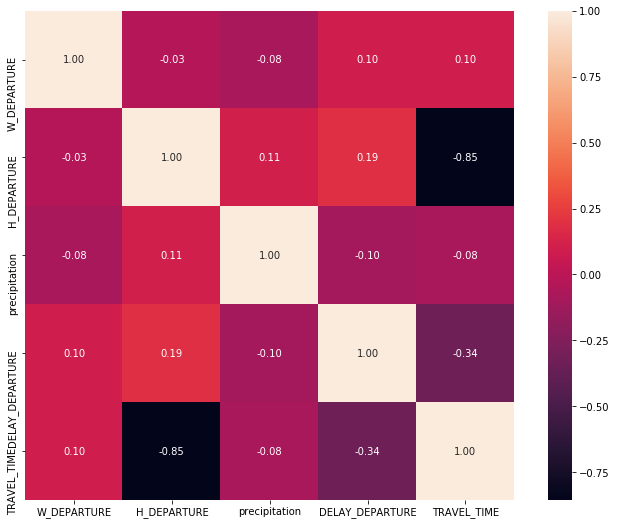

In [122]:
# ヒートマップの表示
plt.figure(figsize=(12, 9))
# annot：数値を表示するか
# square：正方形で表示するか
# fmt：表示する数値の型（.2f→float型で小数点以下２桁表示）
sns.heatmap(df_F1.corr(), annot=True, square=True, fmt='.2f')
plt.show()

In [123]:
#星期离散化
weeks = pd.get_dummies(df_F1['W_DEPARTURE'])
weeks = weeks.add_prefix("{}_".format('DAY_WEEK'))
# data_learn.drop('animal',axis=1,inplace=True)
df_F1 = df_F1.join(weeks)

times = pd.get_dummies(df_F1['H_DEPARTURE'])
times = times.add_prefix("{}_".format('TIME_DAY'))
df_F1 = df_F1.join(times)

df_F1.head()

,SZ_DIANAME,W_DEPARTURE,H_DEPARTURE,precipitation,DELAY_DEPARTURE,TRAVEL_TIME,DAY_WEEK_0,DAY_WEEK_1,DAY_WEEK_2,DAY_WEEK_3,DAY_WEEK_4,DAY_WEEK_5,DAY_WEEK_6,TIME_DAY_8,TIME_DAY_13,TIME_DAY_17,TIME_DAY_19
179,T20,1,8,0,0,120,0,1,0,0,0,0,0,1,0,0,0
432,T20,1,13,0,0,109,0,1,0,0,0,0,0,0,1,0,0
675,T20,1,17,0,0,47,0,1,0,0,0,0,0,0,0,1,0
769,T20,1,19,0,0,61,0,1,0,0,0,0,0,0,0,0,1
1095,T20,2,8,0,0,118,0,0,1,0,0,0,0,1,0,0,0


In [124]:
df_F1.drop('SZ_DIANAME',axis=1,inplace=True)
df_F1.drop('W_DEPARTURE',axis=1,inplace=True)
df_F1.drop('H_DEPARTURE',axis=1,inplace=True)
# df_F1.drop('H_ARRIVAL',axis=1,inplace=True)
df_F1.drop('TRAVEL_TIME',axis=1,inplace=True)

df_F1.head()

,precipitation,DELAY_DEPARTURE,DAY_WEEK_0,DAY_WEEK_1,DAY_WEEK_2,DAY_WEEK_3,DAY_WEEK_4,DAY_WEEK_5,DAY_WEEK_6,TIME_DAY_8,TIME_DAY_13,TIME_DAY_17,TIME_DAY_19
179,0,0,0,1,0,0,0,0,0,1,0,0,0
432,0,0,0,1,0,0,0,0,0,0,1,0,0
675,0,0,0,1,0,0,0,0,0,0,0,1,0
769,0,0,0,1,0,0,0,0,0,0,0,0,1
1095,0,0,0,0,1,0,0,0,0,1,0,0,0


In [125]:
X = df_F1.values
y = df_F1_target.values
# ホールド・アウト法によるデータの分割（今回はtestを２割とする）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
lr = LinearRegression()
lr.fit(X_train, y_train)
# 決定係数：データのモデルへの当てはまりの良さ
print('train: %.3f' % lr.score(X_train, y_train))
print('test : %.3f' % lr.score(X_test, y_test))

train: 0.911
test : 0.724
